In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
zomato = pd.read_csv('zomato.csv',sep = ',', encoding = 'latin-1')
zomato.drop(["url", "address"], inplace = True, axis=1)
zomato = zomato[pd.notnull(zomato['rest_type'])]
zomato = zomato[pd.notnull(zomato['dish_liked'])]
zomato = zomato[pd.notnull(zomato['cuisines'])]
zomato.shape

(23569, 15)

In [3]:
zomato.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
rest_type = zomato['rest_type'].apply(lambda x: pd.Series(x.split(','))) # splitting the column 'rest_type' into multiple columns 
rest_type.columns=['rest_type_1','rest_type_2']# renaming the columns

In [5]:
rest_type.head()

,rest_type_1,rest_type_2
0,Casual Dining,NaN
1,Casual Dining,NaN
2,Cafe,Casual Dining
3,Quick Bites,NaN
4,Casual Dining,NaN


In [6]:
rest_type.shape

(23569, 2)

In [7]:
dish_liked = zomato['dish_liked'].apply(lambda x: pd.Series(x.split(','))) # splitting the column 'dish_liked' into multiple columns 
dish_liked.columns = ['dish_liked_1','dish_liked_2','dish_liked_3','dish_liked_4','dish_liked_5','dish_liked_6','dish_liked_7']# renaming the columns

In [8]:
dish_liked.head()

,dish_liked_1,dish_liked_2,dish_liked_3,dish_liked_4,dish_liked_5,dish_liked_6,dish_liked_7
0,Pasta,Lunch Buffet,Masala Papad,Paneer Lajawab,Tomato Shorba,Dum Biryani,Sweet Corn Soup
1,Momos,Lunch Buffet,Chocolate Nirvana,Thai Green Curry,Paneer Tikka,Dum Biryani,Chicken Biryani
2,Churros,Cannelloni,Minestrone Soup,Hot Chocolate,Pink Sauce Pasta,Salsa,Veg Supreme Pizza
3,Masala Dosa,NaN,NaN,NaN,NaN,NaN,NaN
4,Panipuri,Gol Gappe,NaN,NaN,NaN,NaN,NaN


In [ ]:
dish_liked.shape

(23569, 7)

In [ ]:
cuisines = zomato['cuisines'].apply(lambda x: pd.Series(x.split(','))) # splitting the column 'dish_liked' into multiple columns 
cuisines.columns = ['cuisines_1','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8']# renaming the columns

In [ ]:
cuisines.head()

,cuisines_1,cuisines_2,cuisines_3,cuisines_4,cuisines_5,cuisines_6,cuisines_7,cuisines_8
0,North Indian,Mughlai,Chinese,NaN,NaN,NaN,NaN,NaN
1,Chinese,North Indian,Thai,NaN,NaN,NaN,NaN,NaN
2,Cafe,Mexican,Italian,NaN,NaN,NaN,NaN,NaN
3,South Indian,North Indian,NaN,NaN,NaN,NaN,NaN,NaN
4,North Indian,Rajasthani,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result = pd.concat([zomato, rest_type, dish_liked, cuisines], axis=1) #concating the all dataframes

In [ ]:
result.head()
result.shape

(23569, 32)

In [ ]:
locality_rest_type = pd.DataFrame(result[['location','rest_type_1','rest_type_2']])
locality_rest_type_stack = pd.DataFrame(locality_rest_type.stack())
locality_rest_type.head()

,location,rest_type_1,rest_type_2
0,Banashankari,Casual Dining,NaN
1,Banashankari,Casual Dining,NaN
2,Banashankari,Cafe,Casual Dining
3,Banashankari,Quick Bites,NaN
4,Basavanagudi,Casual Dining,NaN


In [ ]:
keys_rest_type = [c for c in locality_rest_type  if c.startswith('rest_type')]
a_rest_type = pd.melt(locality_rest_type, id_vars='location', value_vars=keys_rest_type, value_name='rest_type') #melting the stack into one row
rest_type_stack=pd.DataFrame(a_rest_type.groupby(by=['location','variable','rest_type']).size().reset_index()) #find the highest restuarant in the city
del rest_type_stack['variable']
rest_type_stack.columns = ['location', 'rest_type', 'count']

In [ ]:
rest_type_stack.head()

,location,rest_type,count
0,BTM,Bakery,15
1,BTM,Bar,12
2,BTM,Beverage Shop,25
3,BTM,Cafe,159
4,BTM,Casual Dining,446


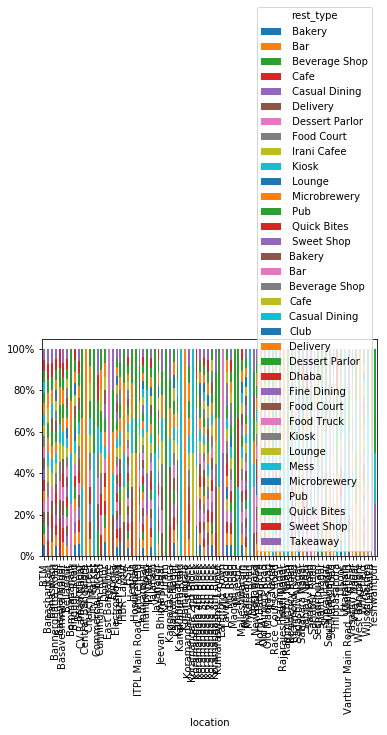

In [ ]:
rest_type_stack.groupby(['location', 'rest_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
rest_type_pivot = rest_type_stack.pivot_table('count', 'location', 'rest_type')
rest_type_pivot.fillna(0, inplace = True)
rest_type_pivot.head()

rest_type,Bakery,Bar,Beverage Shop,Cafe,Casual Dining,Delivery,Dessert Parlor,Food Court,Irani Cafee,Kiosk,...,Food Court,Food Truck,Kiosk,Lounge,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway
location,,,,,,,,,,,,,,,,,,,,,
BTM,13.0,22.0,17.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,0.0,0.0,631.0,28.0,49.0
Banashankari,0.0,0.0,0.0,8.0,11.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,6.0,134.0,3.0,3.0
Banaswadi,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,8.0,0.0,4.0,67.0,5.0,4.0
Bannerghatta Road,19.0,10.0,0.0,4.0,1.0,13.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.0,3.0,0.0,1.0,18.0,144.0,2.0,13.0
Basavanagudi,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,136.0,2.0,0.0


In [ ]:
locality_dish_liked = pd.DataFrame(result[['location','dish_liked_1','dish_liked_2','dish_liked_3','dish_liked_4','dish_liked_5','dish_liked_6','dish_liked_7']])
locality_dish_liked_stack = pd.DataFrame(locality_dish_liked.stack())
locality_rest_type.head()

,location,rest_type_1,rest_type_2
0,Banashankari,Casual Dining,NaN
1,Banashankari,Casual Dining,NaN
2,Banashankari,Cafe,Casual Dining
3,Banashankari,Quick Bites,NaN
4,Basavanagudi,Casual Dining,NaN


In [ ]:
keys_dish_liked = [c for c in locality_dish_liked  if c.startswith('dish_liked')]
a_dish_liked = pd.melt(locality_dish_liked, id_vars='location', value_vars=keys_dish_liked, value_name='dish_liked') #melting the stack into one row
dish_liked_stack=pd.DataFrame(a_dish_liked.groupby(by=['location','variable','dish_liked']).size().reset_index()) #find the highest restuarant in the city
del dish_liked_stack['variable']
dish_liked_stack.columns = ['location', 'dish_liked', 'count']

In [ ]:
dish_liked_stack.head()

,location,dish_liked,count
0,BTM,Aloo Paratha,10
1,BTM,Ambur Biryani,3
2,BTM,Appam,8
3,BTM,Apple Pie Ice Cream,5
4,BTM,Beef Fry,21


In [ ]:
dish_liked_stack.groupby(['dish_liked', 'location']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
dish_liked_pivot = dish_liked_stack.pivot_table('count', 'location', 'dish_liked')
dish_liked_pivot.fillna(0, inplace = True)
dish_liked_pivot.head()

In [ ]:
locality_cuisines=pd.DataFrame(result[['location','cuisines_1','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8']])
locality_cuisines_stack=pd.DataFrame(locality_cuisines.stack()) #stacking the columns 
locality_cuisines.head()

In [ ]:
keys_cuisines = [c for c in locality_cuisines  if c.startswith('cuisine')]
a_cuisines = pd.melt(locality_cuisines, id_vars='location', value_vars=keys_cuisines, value_name='cuisines') #melting the stack into one row
cuisines_stack = pd.DataFrame(a_cuisines.groupby(by=['location','variable','cuisines']).size().reset_index()) #find the highest restuarant in the city
del cuisines_stack['variable']
cuisines_stack.columns = ['location', 'cuisines', 'count']

In [ ]:
cuisines_stack.head()

In [ ]:
cuisines_stack.groupby(['cuisines', 'location']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
cuisine_pivot = cuisines_stack.pivot_table('count', 'location', 'cuisines')
cuisine_pivot.fillna(0, inplace = True)
cuisine_pivot.head()

In [ ]:
# zomato['phone'] = zomato['phone'].str.replace('+', '')
# zomato['phone'] = zomato['phone'].str.replace('\r', '')
# zomato['phone'] = zomato['phone'].str.replace('\n', '')
# zomato['phone'] = zomato['phone'].str.replace(' ', '')